In [18]:
import networkx as nx
import csv
import matplotlib.pyplot as plt

In [19]:
class UsedCar:
    def __init__(self, brand, modelname, price, brandrank, carAge):
        self.brand = brand
        self.modelname = modelname
        self.price = price
        self.brandrank = brandrank
        self.carAge = carAge

In [20]:
with open("UsedCar.csv") as csvfile:
    reader = csv.reader(csvfile)
    print(next(reader))
    print(next(reader))

['', 'name', 'year', 'brand', 'fullmodelname', 'modelname', 'price', 'distance_travelled(kms)', 'fuel_type', 'city', 'brandrank', 'carAge', 'distance below 30k km', 'new and less used', 'inv_car_price', 'inv_car_dist', 'inv_car_age', 'inv_brand', 'std_invprice', 'std_invdistance_travelled', 'std_invrank', 'best_buy1', 'best_buy2']
['0', '0', '2016', 'Honda', 'Honda Brio S MT', 'Brio', '425000', '9680', 'Petrol', 'Mumbai', '7', '5', '1', '0', '2.35E-06', '0.000103306', '0.2', '0.142857143', '0.143416889', '0.035729816', '0.132142857', '677.1342393', '0']


In [21]:
with open("UsedCar.csv") as csvfile:
    reader = csv.reader(csvfile)
    rows = 0
    for r in reader:
        rows +=1 
    print(rows)

1726


In [22]:
Cars = []
with open("UsedCar.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        brand = row['brand']
        modelname = row['modelname']
        price = row['price']
        brandrank = row["brandrank"]
        carAge = row['carAge'].split(', ')
        Cars.append(UsedCar(brand, modelname, price, brandrank, carAge))

In [23]:
print(Cars[20].modelname)
print(Cars[20].price)

WR-V
749000


In [24]:
for c in Cars[0].price:
    print(c)

4
2
5
0
0
0


In [25]:
CarpriceGraph = nx.Graph()

In [26]:
carpriceSubset = Cars[0:100]

In [27]:
for f in carpriceSubset:
    CarpriceGraph.add_node(f, brand = (f.brand[:10], "utf-8"))

In [28]:
color=[]
for f1 in carpriceSubset:
    for f2 in carpriceSubset:
        if not f1 == f2:
            if f1.carAge == f2.carAge:
                CarpriceGraph.add_edge(f1,f2)
                color.append('orange')
            if f1.modelname == f2.modelname:
                CarpriceGraph.add_edge(f1,f2)
                color.append('purple')

In [29]:
lables = nx.get_node_attributes(CarpriceGraph, 'brand')
print(lables)

{<__main__.UsedCar object at 0x00000196168DD790>: ('Honda', 'utf-8'), <__main__.UsedCar object at 0x00000196168DD6A0>: ('Nissan', 'utf-8'), <__main__.UsedCar object at 0x00000196168EF0A0>: ('Toyota', 'utf-8'), <__main__.UsedCar object at 0x000001961902FD30>: ('Mercedes-B', 'utf-8'), <__main__.UsedCar object at 0x000001961902F1F0>: ('Hyundai', 'utf-8'), <__main__.UsedCar object at 0x000001961902F3D0>: ('Hyundai', 'utf-8'), <__main__.UsedCar object at 0x000001961907F070>: ('Toyota', 'utf-8'), <__main__.UsedCar object at 0x000001961907F0D0>: ('Mercedes-B', 'utf-8'), <__main__.UsedCar object at 0x000001961907F130>: ('Hyundai', 'utf-8'), <__main__.UsedCar object at 0x000001961907F190>: ('Maruti Suz', 'utf-8'), <__main__.UsedCar object at 0x000001961907F1F0>: ('Hyundai', 'utf-8'), <__main__.UsedCar object at 0x000001961907F250>: ('Toyota', 'utf-8'), <__main__.UsedCar object at 0x000001961907F2B0>: ('Maruti Suz', 'utf-8'), <__main__.UsedCar object at 0x000001961907F310>: ('Renault', 'utf-8'),

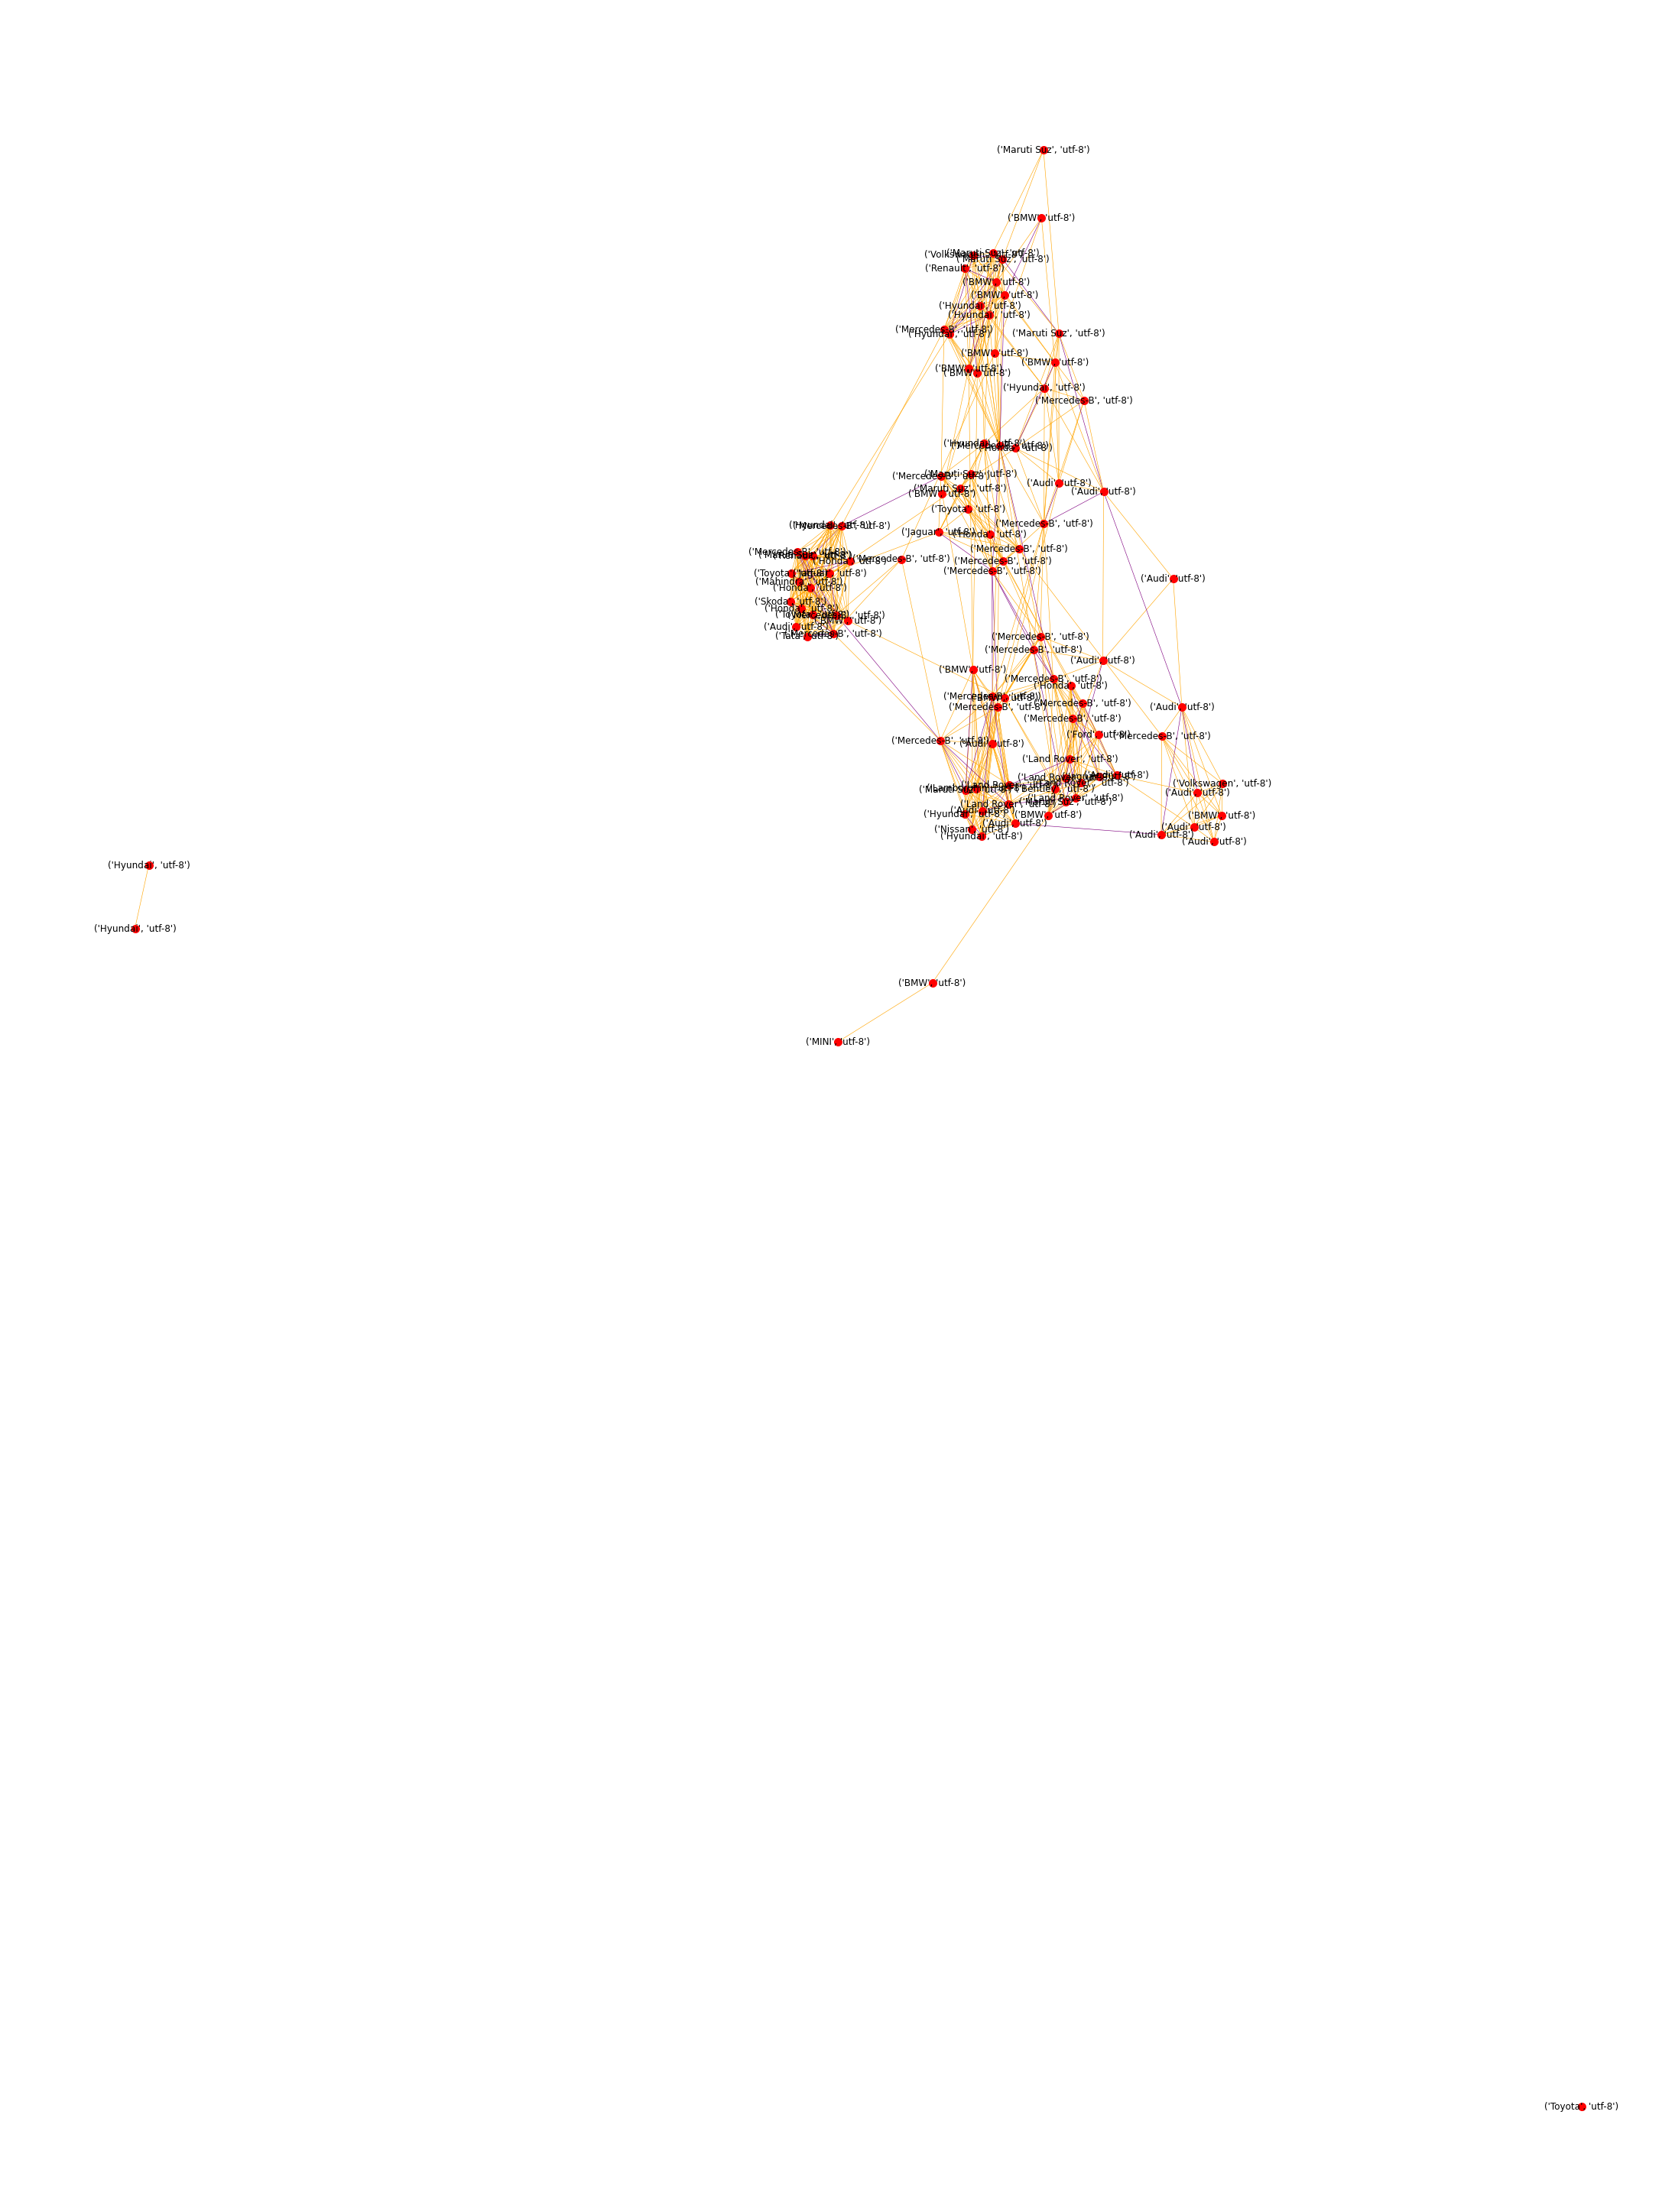

In [30]:
options = {'node_color':'red', 'node_size':100, 'edge_color':color, 'width':0.6, 'labels':lables, 'with_labels':True}
plt.figure(1,figsize =(30,40))
nx.draw(CarpriceGraph, **options)

The graph shows the connections between every used-car on their brands and car age. Red nodes shows the brand. Orange lines represent the same car age. blue line means same model name.